# Tree-Based Methods

在本章中，我们描述了基于树的回归和分类方法。基于树的方法是简单和有用的解释。然而，在预测准确性方面，它们通常比不上最好的监督学习方法，如第6章和第7章中所见的方法。在本章中，我们还介绍了套袋、随机森林和助推。每一种方法都需要生成多个树，然后将这些树组合起来生成单一的共识预测。我们将看到，结合大量的树通常会导致预测精度的显著提高，但代价是在解释方面的一些损失。

## 决策树的基础知识

### 回归树

#### 通过特征空间分层进行预测

构建回归树的过程。大致来说，有两个步骤：
* 我们将可能的数据集 $X_1$, $X_2$,..., $X_p$ 分成 $J$ 个独立不重合的区域 $R_1$, $R_2$,..., $R_J$. 
* 对于每个落在区域$R_j$中的观测值,我们以区域$R_j$中的平均值作为该观测值的结果。

理论上，这些区域可以是任何形状。然而，我们选择将预测器空间划分为高维矩形，或方框，为简化和易于解释所得到的预测模型。目的是发现区域 $R_1$, $R_2$,..., $R_J$能够最小化函数 $RSS$,
$$RSS = \sum_{j=1}^{J} \sum_{i \in R_{j}}\left(y_{i}-\hat{y}_{R_{j}}\right)^{2}\tag{8.1} $$
其中 $\hat{y}_{R_{j}}$是在区域$j$的平均值。

由于将特征空间的每个可能分区都考虑到J个方框在计算上是不可行的。为此，我们采用了一种自顶向下的贪婪方法，称为递归二进制分割。***recursive binary splitting (递归二元分裂)***.

递归二进制分割方法是*自顶向下*的，因为它从树的顶部开始(在这一点上所有的观测都属于一个单一的区域)，然后依次分割预测器空间;每一次分叉都是通过树下方的两个新分支来表示的。它是*贪婪*的，因为在造树过程的每一步，最好的分割是在当前特定的步骤下进行，而不是选择一个会在未来的某个步骤中产生更好的树的分割。 

对于任何的$j$ 和 $s$, 我们定义一对半球面
$$
R_{1}(j, s)=\left\{X \mid X_{j}<s\right\} \text { and } R_{2}(j, s)=\left\{X \mid X_{j} \geq s\right\}\tag{8.2}
$$
然后我们选出能够最小化以下公式的最优的$j$ 和 $s$ 
$$
\sum_{i: x_{i} \in R_{1}(j, s)}\left(y_{i}-\hat{y}_{R_{1}}\right)^{2}+\sum_{i: x_{i} \in R_{2}(j, s)}\left(y_{i}-\hat{y}_{R_{2}}\right)^{2}\tag{8.3}
$$
其中： $\hat{y}_{R_{1}}$ 是在半球面 $R_{1}(j, s)$的均值, $\hat{y}_{R_{2}}$ 是在半球面 $\hat{y}_{R_{2}}$上的均值.

接下来，我们重复这一过程，寻找最佳预测器和最佳切割点，以便进一步分割数据，以最小化每个结果区域内的$RSS$。直到达到了某一停止标准。

一旦区域$R_1$, $R_2$,..., $R_J$  已经创建，我们使用测试观察值所属区域的训练的平均值来预测给定测试数据的值。

图8.3显示了该方法的五个区域的示例。
<img src="img/8.3.jpg" style="zoom:50%" />
左上：二维特征空间的一个分区，它不是递归二进制分割的结果

右上:二维例子上递归二进制分割的输出。

左下:与右上面板中的分区相对应的树。

右下:对应于该树的预测曲面的透视图。

#### 树剪枝

上述过程可能对训练集产生良好的预测，但可能对数据进行***过拟合***，导致测试集性能较差。这是因为生成的树可能太复杂了。更小的树有更少的分割(也就是说，更少的区域$R_1$， $R_2$，…$R_J$)可能会导致更低的方差和更好的解释，但代价是有一点偏差。因此，更好的策略是生长一棵非常大的树$T_0$，然后***将它剪回(prune the tree)***，以获得一个子树。我们如何确定修剪树木的最好方法?

***Cost complexity pruning (代价复杂度剪枝)*** — 也被称为最薄弱环节修剪——为我们提供了一种方法来做到这一点。我们没有考虑所有可能的子树，而是考虑一个由非负调优参数$\alpha$索引的树序列。对于$\alpha$的每个值，都对应着一个子树$T \subset T_{0}$ ，使得
$$
\sum_{m=1}^{|T|} \sum_{x_{i} \in R_{m}}\left(y_{i}-\hat{y}_{R_{m}}\right)^{2}+\alpha|T|\tag{8.4}
$$
尽可能的小。$|T|$ 为该树的终端节点数$T$, $R_m$ 是矩形(即预测器空间的子集) ，用于响应第 $m$ 个终端节点,  $\hat{y}_{R_{m}}$ 是在区域$R_m$中的观察值的均值。 

调整参数$\alpha$控制子树的复杂性和它对训练数据的适合度之间的权衡 。 当 $\alpha = 0$, 子树$T$ 等于 $T_0$。 当$\alpha$ 增加，拥有一棵有许多终端节点的树是要付出代价的，因此对于较小的子树，数量(8.4)将趋向于最小化。

Equation 8.4 类似于lasso (6.7) 第六章，为了控制线性模型的复杂性，使用了类似的公式。

Reference: 
1. [How to choose 𝛼 in cost-complexity pruning?](https://stats.stackexchange.com/questions/193538/how-to-choose-alpha-in-cost-complexity-pruning)
2. [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

****
***算法8.1***  构建回归树
***
1. 使用递归二进制分裂在训练数据上生长一棵大树，只有当每个终端节点的观测值小于某个最小值时才停止。
2. 对大树进行代价复杂度剪枝，以获得一组最优子树序列，作为$ \alpha$的函数。
3. 使用K重交叉验证去选择$\alpha$. 对于$k = 1,..., K$:  
(a) 使用全体的数据集去除第 $K$th 数据集，并重复过程1，2.  
(b) 计算第 $k$次折叠的平均平方预测误差, 作为 $\alpha$的函数.  
将结果取平均值，并选择 $\alpha$以最小化平均误差
4. 返回步骤2中对应于选定值  $\alpha$ 的子树
***

<img src="https://img-blog.csdnimg.cn/20190514163259233.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzMyNjQ5NTgx,size_16,color_FFFFFF,t_70" style="zoom:50%" />

图8.4和8.5显示了对***Hitters*** 数据进行拟合和修剪回归树的结果，使用了9个特征。

首先，我们将数据集随机分成两半，在训练集中产生132个观察值，在测试集中产生131个观察值。

然后，我们在训练数据上建立一个大型回归树，并在（8.4）中改变$\alpha$，以便创建具有不同数量终端节点的子树。

最后，我们进行了6次交叉验证，以估计交叉验证树的MSE作为α的函数。
未修剪的回归树如图8.4所示
<img src="img/8.4.jpg" style="zoom:50%" >

<img src="img/8.5.jpg" style="zoom:50%" >

#### 用回归树预测棒球运动员的工资

我们使用***Hitters*** 数据集，根据*Years* (他在大联盟打球的年数)和*Hits*(他在前一年打出的安打数)预测棒球运动员的薪水。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Microsoft YaHei'

- train_test_split：分割数据集 https://blog.csdn.net/cymy001/article/details/79078470

- sklearn.tree: 回归树，分类树，画出图  

- classification_report：分类报告https://blog.csdn.net/akadiao/article/details/78788864

- LabelEncoder：编码，分类变量变成数字  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

In [3]:
#去除缺失值
Hitters = pd.read_csv('Hitters.csv').dropna()
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


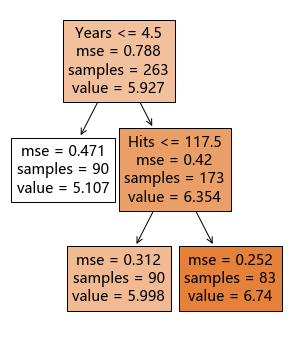

In [4]:
# 图8.1
X = Hitters[['Years','Hits']]
y = np.log(Hitters['Salary'])#对收入进行对数变化 

dtr = DecisionTreeRegressor(max_leaf_nodes=3)
dtr.fit(X,y)
plt.figure(figsize=(5,6))
_ = plot_tree(dtr,feature_names=['Years','Hits'],class_names='Salary',filled=True)

树有两个内部节点和三个终端节点（***叶子***）。每片叶子上的数字是落在相应条件下的平均值。 



这个回归结果可以写成三块区域：$R_1= \{X | Years<4.5 \} $, $R_2 = \{ X | Years>=4.5, Hits<117.5 \}$, and $R_3= \{ X | Years>=4.5, Hits>=117.5 \}$ .

- 树结构有一个称为tree_的属性，它允许访问低级属性 

以下是决策分类器的一个介绍文档，但是殊途同归，可以参考来理解回归树中的参数
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html?highlight=tree_%20threshold

In [5]:
# 找到树的的分块
print(dtr.tree_.threshold)
years = dtr.tree_.threshold[0] # 'Years'的分块: 4.5
hits = dtr.tree_.threshold[2] # 'Hits'的分块: 117.5

[  4.5  -2.  117.5  -2.   -2. ]


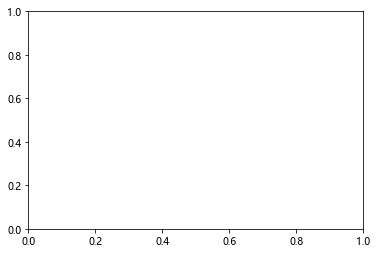

In [6]:
sns.scatterplot()

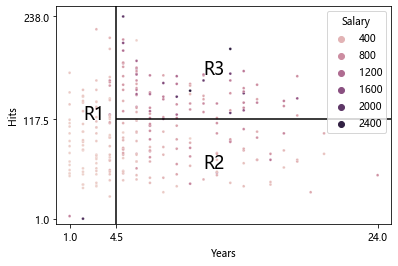

In [7]:
sns.scatterplot(x = 'Years',y = 'Hits',hue = Hitters['Salary'],s=8,data=Hitters)
plt.xlabel('Years')
plt.ylabel('Hits')
plt.xlim(0,25)
plt.ylim(-5)
plt.xticks([1,4.5,24])
plt.yticks([1,117.5,238])
plt.vlines(years, ymin=-5, ymax=250)
plt.hlines(hits, xmin=years, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')
plt.show()

回归树中的Hitters数据集的三个区域分区如上图所示。

### 分类树

分类树与回归树非常相似，不同的是它是用来预测定性反应而不是定量反应的分类树。回想一下，对于回归树，一个观察结果的预测响应是由属于同一终端节点的训练观察结果的平均响应给出的。相比之下，对于分类树，我们预测每个观察属于其所属区域中最常见的训练观察类。在解释分类树的结果时，我们通常不仅对对应于特定终端节点区域的类预测感兴趣，而且还对属于该区域的训练观测的类所占比例感兴趣。

培育分类树的任务与培育回归树的任务非常相似。就像在回归设置中一样，我们使用递归二叉分裂来生长分类树。但是，在分类设置中，***RSS***不能用作进行二进制拆分的标准。RSS的一个自然替代方法是***分类错误率***。由于我们计划将一个区域内的观测值分配给该区域内最常见的训练观测值类别，因此分类错误率只是该区域内不属于最常见类别的训练观测值的分数:
$$
E=1-\max _{k}\left(\hat{p}_{m k}\right)\tag{8.5}
$$
$\hat{p}_{m k}$ 表示第k类的在第m个区域中的比例。

但结果表明，分类误差对树木生长不够敏感，在实际应用中有两种方法更可取

***Gini index*** （基尼系数）定义为
$$
G=\sum_{k=1}^{K} \hat{p}_{m k}\left(1-\hat{p}_{m k}\right)\tag{8.6}
$$
衡量K类的总方差。不难看出，如果所有$\hat{p}_{m k}$都接近于零或一，那么基尼指数就会很小。由于这个原因，Gini索引被称为节点纯度的度量—一个小的值表明一个节点包含来自单个类的主要观察结果。

***cross-entropy***（交叉熵）
$$
D=-\sum_{k=1}^{K} \hat{p}_{m k} \log \hat{p}_{m k}\tag{8.7}
$$
我们可以证明，如果$\hat{p}_{m k}$都接近于零或接近于1，交叉熵就会趋于零。因此，就像Gini指数一样，如果第m个节点是纯的，交叉熵将取一个小值。

事实上，Gini指数和交叉熵在数值上是非常相似的

在构建分类树时，通常使用基尼指数或交叉熵来评估特定分割的质量，因为这两种方法对节点纯度比分类错误率更敏感。在对树进行修剪时，可以使用这三种方法中的任何一种，但以最终修剪树的预测精度为目标时，分类错误率更佳。

这些数据包含了303例胸痛患者的二元结果（HD）。结果值为Yes表示根据血管造影检查存在心脏病，而No表示没有心脏病。有13个预测因素，包括年龄、性别、Chol(一种胆固醇测量方法)和其他心肺功能测量。

In [8]:
Heart = pd.read_csv('Heart.csv',index_col=0).dropna()
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


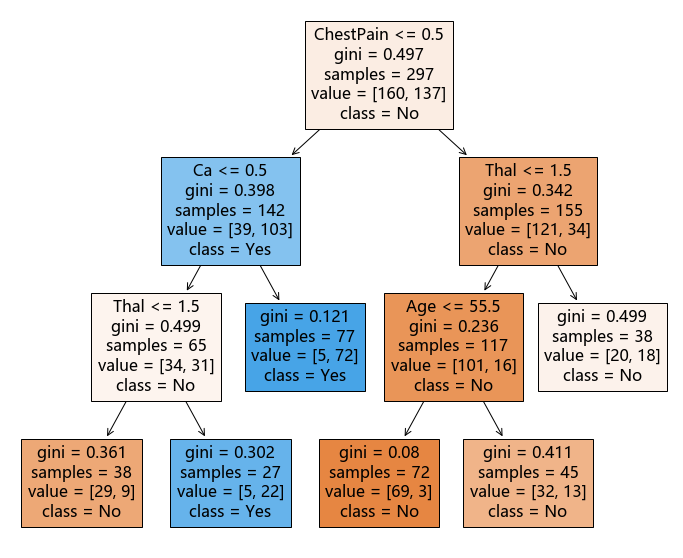

In [9]:
# Figure 8.6
# 将分类变为数值变量
le = LabelEncoder()
qualitative_columns = ['ChestPain','Thal','AHD']

for column in qualitative_columns:
    Heart[column] = le.fit_transform(Heart[column])

# Do the classfication
X = Heart.drop('AHD',axis=1)
y = Heart['AHD']

dtc = DecisionTreeClassifier(max_leaf_nodes=6)
dtc.fit(X,y)
fig = plt.figure(figsize=(12,10))
_ = plot_tree(dtc,feature_names=X.columns,class_names=['No','Yes'],filled=True)

图8.6有一个令人惊讶的特点:部分拆分产生两个具有***相同预测值***的终端节点。

### 树与线性模型

线性假设的模型形式
$$
f(X)=\beta_{0}+\sum_{j=1}^{p} X_{j} \beta_{j}\tag{8.8}
$$
回归模型假设的模型形式
$$
f(X)=\sum_{m=1}^{M} c_{m} \cdot 1_{\left(X \in R_{m}\right)}\tag{8.9}
$$
其中$R_1,...,R_M$ 表示特性空间的一个分区

哪个模型更好?这取决于手头的问题。如果特征和响应之间的关系可以用(8.8)中的线性模型很好地近似，那么线性回归之类的方法可能会工作得很好。如果特征和响应之间存在高度非线性和复杂的关系，如模型(8.9)所示，那么决策树可能优于经典方法。

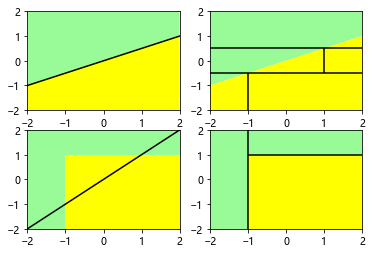

In [10]:
# Figure 8.7
# Subfigure 1
plt.subplot(2,2,1)
x=[-2,-1,0,1,2]
y=[-1,-0.5,0,0.5,1]

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.fill_between(x,y,2,facecolor='palegreen')
plt.fill_between(x,-2,y,facecolor='yellow')

plt.plot(x,y,c='black')

# Subfigure 2
plt.subplot(222)
x=[-2,-1,0,1,2]
y=[-1,-0.5,0,0.5,1]

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.fill_between(x,y,2,facecolor='palegreen')
plt.fill_between(x,-2,y,facecolor='yellow')
plt.vlines(x=-1,ymin=-2, ymax=-0.5)
plt.vlines(x=1,ymin=-0.5, ymax=0.5)
plt.hlines(y=-0.5,xmin=-2, xmax=2)
plt.hlines(y=0.5,xmin=-2, xmax=2)

# Subfigure 3
plt.subplot(223)
x=[-1,2]

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.fill_between(x,-2,1,facecolor='yellow')
plt.fill_between([-2,-1],-2,2,facecolor='palegreen')
plt.fill_between([-1,2],1,2,facecolor='palegreen')
plt.plot([-2,2],[-2,2],color='black')

# Subfigure 4
plt.subplot(224)
x=[-1,2]

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.fill_between(x,-2,1,facecolor='yellow')
plt.fill_between([-2,-1],-2,2,facecolor='palegreen')
plt.fill_between([-1,2],1,2,facecolor='palegreen')
plt.vlines(x=-1,ymin=-2,ymax=2)
plt.hlines(y=1,xmin=-1, xmax=2)

plt.show()

第一行:

- 一个二维分类例子，其中真实的决策边界是线性的，用阴影区域表示。  
- 假设线性边界(左)的经典方法将优于执行与轴平行的拆分(右)的决策树。

下面一行:

- 这里真正的决策边界是非线性的。

- 在这里，线性模型无法捕获真实的决策边界(左)，而决策树是成功的(右)。

当然，在选择统计学习方法时，除了简单的测试错误外，还需要考虑其他因素;例如，在某些设置中，为了便于解释和可视化，使用树进行预测可能是首选。

### 树木的优缺点

优点：
1. 树木很容易向人们解释。事实上，它们甚至比线性回归更容易解释!
2. 有些人认为决策树比前面章节中看到的回归和分类方法更接近于人类决策
3. Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
4. 树可以以图形方式显示，即使是非专家也很容易解释(特别是当它们很小的时候)
- 树可以很容易地处理定性预测，而不需要创建虚拟变量。

缺点：
1. 不幸的是，树的预测精度通常不如本书中提到的其他一些回归和分类方法。

然而，通过聚集许多决策树，使用袋装(bagging)、随机森林(random forests)和增强(boosting)等方法，可以显著提高树的预测性能。我们将在下一节介绍这些概念

## 实验：决策树

### 回归树

In [11]:
Boston = pd.read_csv('Boston.csv').dropna()
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
# 做树回归
X = Boston.drop('medv',axis=1)
y = Boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
print('Total accuracy: %f'%dtr.score(X,y))

Total accuracy: 0.854555


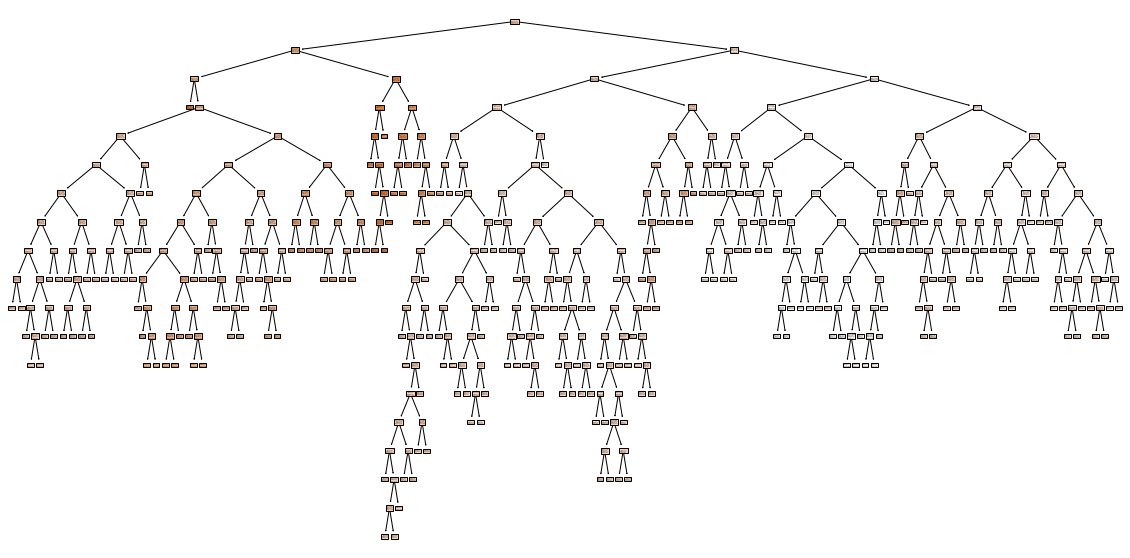

In [13]:
# 未裁剪树
fig = plt.figure(figsize=(20,10))
_ = plot_tree(dtr,feature_names=X.columns,class_names=['No','Yes'],filled=True)

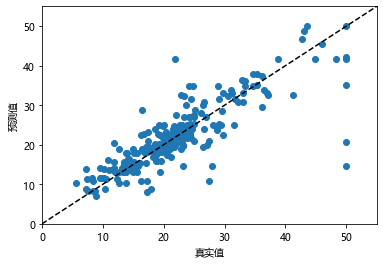

In [14]:
# 比较真实值和预测值
pred = dtr.predict(X_test)
plt.scatter( y_test,pred)
plt.plot([0,100],[0,100],'--k')
plt.xlim(0,55)
plt.ylim(0,55)
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.show()

In [15]:
# 计算最小均方误差
mean_squared_error(y_test, pred)

24.55687747035573

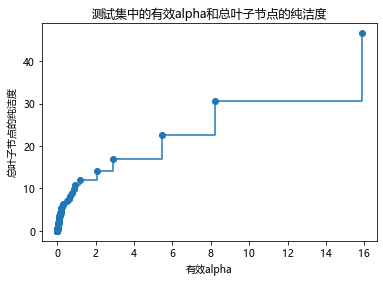

In [16]:
# 代价复杂度修剪的后修剪决策树

#在下面的图中，删除了最大有效alpha值，因为它是一棵只有一个节点的平凡树。
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

plt.plot(ccp_alphas,impurities, marker='o', drawstyle="steps-post")
plt.xlabel('有效alpha')
plt.ylabel('总叶子节点的纯洁度')
plt.title('测试集中的有效alpha和总叶子节点的纯洁度')
plt.show()

In [17]:
dtrs = []
for ccp_alpha in ccp_alphas:
    dtr = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dtr.fit(X_train, y_train)
    dtrs.append(dtr)

nodes = [dtr.get_n_leaves() for dtr in dtrs]
depth = [dtr.get_depth() for dtr in dtrs]

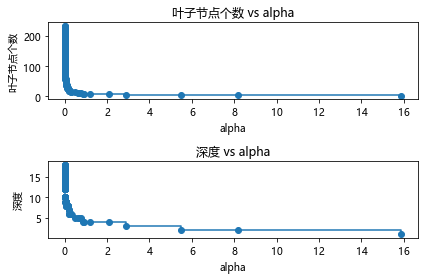

In [18]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, nodes, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("叶子节点个数")
ax[0].set_title("叶子节点个数 vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("深度")
ax[1].set_title("深度 vs alpha")
fig.tight_layout()

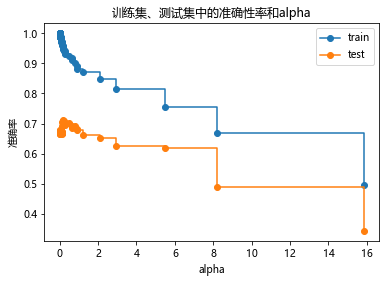

In [19]:
train_scores = [dtr.score(X_train, y_train) for dtr in dtrs]
test_scores = [dtr.score(X_test, y_test) for dtr in dtrs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("准确率")
ax.set_title("训练集、测试集中的准确性率和alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
# 寻找最高的测试得分
optimal = np.argmax(test_scores)
print('The highest accuracy is: %f'%test_scores[optimal], '\nThe CCP-alpha is: %f'%ccp_alphas[optimal], 
      '\nNumber of leaves nodes: %f'%nodes[optimal], '\nThe depth is: %f'%depth[optimal])

The highest accuracy is: 0.710797 
The CCP-alpha is: 0.174563 
Number of leaves nodes: 23.000000 
The depth is: 8.000000


In [21]:
#采用五折交叉验证的方法选取，通过选取训练值的均值，来判断最优的alpha
test2_scores = [cross_val_score(dtr,X_train,y_train,scoring='r2',cv=5).mean() for dtr in dtrs]

In [22]:
optimal = np.argmax(test2_scores)
print('The highest accuracy is: %f'%test_scores[optimal], '\nThe CCP-alpha is: %f'%ccp_alphas[optimal], 
      '\nNumber of leaves nodes: %f'%nodes[optimal], '\nThe depth is: %f'%depth[optimal])

The highest accuracy is: 0.706966 
The CCP-alpha is: 0.211783 
Number of leaves nodes: 19.000000 
The depth is: 6.000000


### 分类树

In [23]:
Carseats = pd.read_csv('Carseats.csv')

# Sales是一个连续变量，因此我们首先将其重新编码为一个二进制变量
Carseats['High'] = Carseats['Sales'].apply(lambda x:1 if x>8 else 0)
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [24]:
#分类变量列
qualitative_columns = ['ShelveLoc','Urban','US']

#对分类变量的列进行转化为分类0，1，2....
for column in qualitative_columns:
    Carseats[column] = le.fit_transform(Carseats[column])

# Do the Classification
X = Carseats.drop(['Sales','High'],axis=1)
y = Carseats['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
print('Total accuracy: %f'%dtc.score(X,y))
print(classification_report(y, dtc.predict(X),target_names = ['salary <= 8','salary > 8']))

Total accuracy: 0.855000
              precision    recall  f1-score   support

 salary <= 8       0.85      0.91      0.88       236
  salary > 8       0.86      0.77      0.81       164

    accuracy                           0.85       400
   macro avg       0.86      0.84      0.85       400
weighted avg       0.86      0.85      0.85       400



feature_importances_ ：https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=feature_importances_#sklearn.tree.DecisionTreeClassifier.feature_importances_

In [25]:
#描述特征的重要性。计算为该特征带来的标准的总约简(归一化)。这也被称为gini的重要性
print('Feature importance:\n %s'%dict(zip(X.columns, dtc.feature_importances_)))
#叶节点的个数
print('\nTerminal nodes: %f'%dtc.get_n_leaves())
#树的深度
print('\nDepth: %f'%dtc.get_depth())

Feature importance:
 {'CompPrice': 0.15715126285408312, 'Income': 0.09045326430884951, 'Advertising': 0.13235128799922508, 'Population': 0.02000293376361865, 'Price': 0.35091489074304477, 'ShelveLoc': 0.07247741134828184, 'Age': 0.11274134265843128, 'Education': 0.06390760632446577, 'Urban': 0.0, 'US': 0.0}

Terminal nodes: 38.000000

Depth: 9.000000


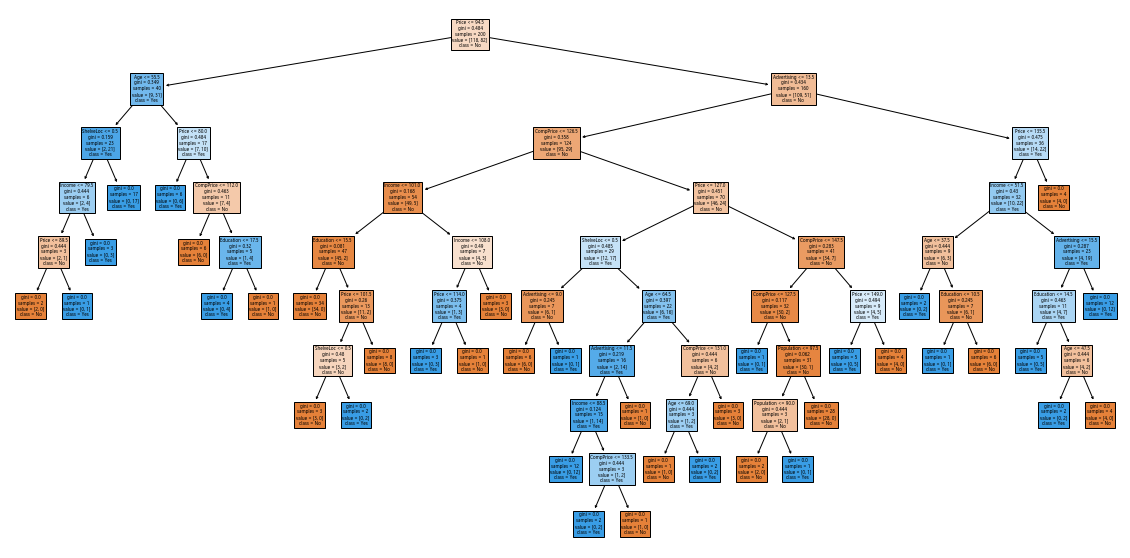

In [26]:
# 没有修建的树模型
fig = plt.figure(figsize=(20,10))
_ = plot_tree(dtc,feature_names=X.columns,class_names=['No','Yes'],filled=True)

In [27]:
# 预测精度
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,97,37
Yes,21,45


In [28]:
print('正确率为：%f'%((cm.iloc[0,0]+cm.iloc[1,1])/200)) # 手动方法
print('Test Accuracy: %f'%dtc.score(X_test,y_test)) # 自动方法

正确率为：0.710000
Test Accuracy: 0.710000


- 代价复杂度修剪的后修剪决策树

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

In [29]:
dtc.cost_complexity_pruning_path(X_train,y_train)

{'ccp_alphas': array([0.        , 0.00466667, 0.00483871, 0.00608696, 0.00638298,
        0.00666667, 0.0075    , 0.008     , 0.00816667, 0.00857143,
        0.00857143, 0.00907258, 0.00936072, 0.01101449, 0.01142857,
        0.01280303, 0.01449638, 0.01570652, 0.01680556, 0.01813704,
        0.01964939, 0.02420672, 0.03970453, 0.0666125 ]),
 'impurities': array([0.        , 0.00933333, 0.01901075, 0.03727162, 0.05642056,
        0.06975389, 0.07725389, 0.08525389, 0.09342056, 0.10199199,
        0.11056342, 0.119636  , 0.13835743, 0.17140091, 0.18282948,
        0.19563251, 0.23912164, 0.25482816, 0.27163372, 0.28977075,
        0.32906953, 0.37748297, 0.4171875 , 0.4838    ])}

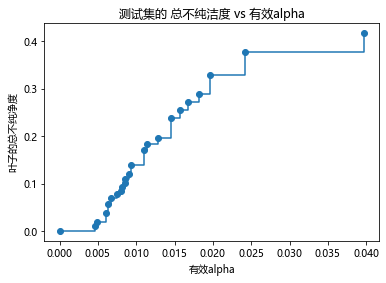

In [30]:
# 代价复杂度修剪的后修剪决策树

#在下面的图中，删除了最大有效alpha值，因为它是一棵只有一个节点的平凡树。
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

plt.plot(ccp_alphas,impurities, marker='o', drawstyle="steps-post")
plt.xlabel('有效alpha')
plt.ylabel('叶子的总不纯净度')
plt.title('测试集的 总不纯洁度 vs 有效alpha')
plt.show()

In [31]:
dtcs = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)

nodes = [dtc.get_n_leaves() for dtc in dtcs]
depth = [dtc.get_depth() for dtc in dtcs]

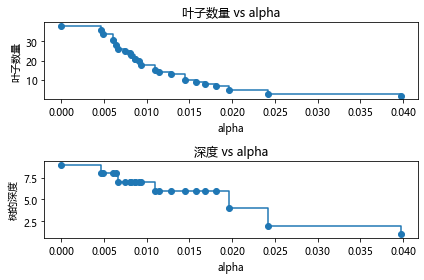

In [32]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, nodes, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("叶子数量")
ax[0].set_title("叶子数量 vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("树的深度")
ax[1].set_title("深度 vs alpha")
fig.tight_layout()

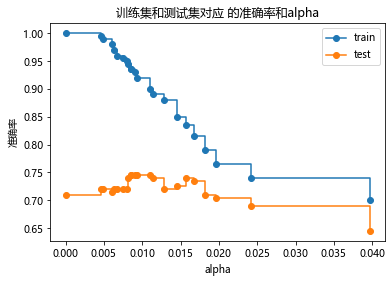

In [33]:
#训练集和测试集的准确率
#我们以准确率作为裁剪的方式
train_scores = [dtc.score(X_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(X_test, y_test) for dtc in dtcs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("准确率")
ax.set_title("训练集和测试集对应 的准确率和alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
# 找到最高的测试准确率
optimal = np.argmax(test_scores)
print('最高的准确率: %f'%test_scores[optimal], '\n对应的 CCP-alpha: %f'%ccp_alphas[optimal], 
      '\n叶子节点的数量: %f'%nodes[optimal], '\n深度为: %f'%depth[optimal])

最高的准确率: 0.745000 
对应的 CCP-alpha: 0.008571 
叶子节点的数量: 21.000000 
深度为: 7.000000


In [35]:
test2_scores = [cross_val_score(dtc,X_train,y_train,cv=5).mean() for dtc in dtcs]


In [36]:
optimal = np.argmax(test_scores)
print('最高的准确率: %f'%test_scores[optimal], '\n对应的 CCP-alpha: %f'%ccp_alphas[optimal], 
      '\n叶子节点的数量: %f'%nodes[optimal], '\n深度为: %f'%depth[optimal])

最高的准确率: 0.745000 
对应的 CCP-alpha: 0.008571 
叶子节点的数量: 21.000000 
深度为: 7.000000
